In [10]:
import pylab as pl
import numpy as np
import scipy as sp
import scipy.optimize as spo
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import csv
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow import keras

In [29]:
batch_x_val = []

df_3 = pd.read_csv('p_v_lin_200_ex.csv')

for index, rows in df_3.iterrows():
    list_3 = rows
    batch_x_val.append(list_3)
    
df_4 = pd.read_csv('p_v_circ_200_ex.csv')
for index, rows in df_4.iterrows():
    list_4 = rows
    batch_x_val.append(list_4)
    
batch_x_val = tf.convert_to_tensor(batch_x_val, dtype=tf.float32)

In [49]:
batch_x_test = []

rows_to_keep = [150,299]
df_3 = pd.read_csv('p_lin_200.csv',skiprows= lambda x: x not in rows_to_keep, usecols=range(71))

for index, rows in df_3.iterrows():
    list_3 = rows
    batch_x_test.append(list_3)
    
df_4 = pd.read_csv('p_circ_100.csv',nrows=[150:149], usecols=range(71))
for index, rows in df_4.iterrows():
    list_4 = rows
    batch_x_test.append(list_4)
    
#batch_x_train = tf.keras.utils.to_categorical(batch_x_train) #turn this into a tensor not categorical
batch_x_test = tf.convert_to_tensor(batch_x_test, dtype=tf.float32)

In [30]:
y_prediction = model.predict(batch_x_val)
y_prediction = np.argmax(y_prediction, axis=1)
y_test = np.argmax(batch_y_train, axis=1)
result = tf.math.confusion_matrix(y_test, y_prediction, num_classes=2, weights=None)
print(result)

10/10 [==============================] - 0s 4ms/step
tf.Tensor(
[[116  33]
 [ 27 122]], shape=(2, 2), dtype=int32)


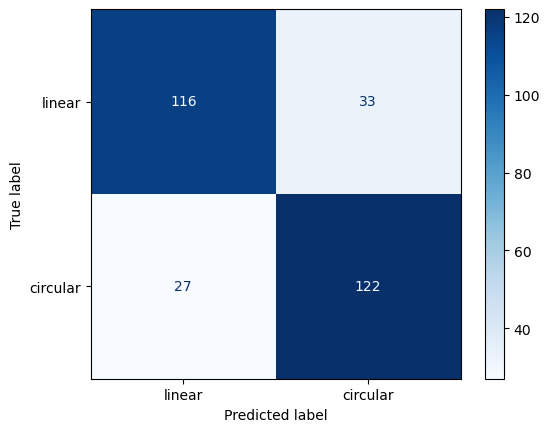

In [31]:
labels = ["linear", "circular"]
cm = confusion_matrix(y_test, y_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [16]:
batch_x_test = []
batch_y_test = []

df_1 = pd.read_csv('p_lin_100.csv')

for index, rows in df_1.iterrows():
    batch_y_train.append(0)
    list_1 = rows
    batch_x_train.append(list_1)
    
df_2 = pd.read_csv('p_circ_100.csv')            

for index, rows in df_2.iterrows():
    batch_y_train.append(1)
    list_2 = rows
    batch_x_train.append(list_2)

In [23]:
model.save('P_extended_TS_LSTM.keras')